In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import tensorflow as tf
from sklearn import datasets
sess = tf.Session()

In [10]:
iris = datasets.load_iris()
x_vals = np.array([[x[1], x[2], x[3]] for x in iris.data])
y_vals = np.array([y[0] for y in iris.data])

batch_size = 50
learning_rate = 0.001
x_data = tf.placeholder(shape=[None, 3], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)
A = tf.Variable(tf.random_normal(shape=[3,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))
model_output = tf.add(tf.matmul(x_data, A), b)

elastic_param1 = tf.constant(1.)
elastic_param2 = tf.constant(1.)
l1_a_loss = tf.reduce_mean(tf.abs(A))
l2_a_loss = tf.reduce_mean(tf.square(A))
e1_term = tf.multiply(elastic_param1, l1_a_loss)
e2_term = tf.multiply(elastic_param2, l2_a_loss)
loss = tf.expand_dims(tf.add(tf.add(tf.reduce_mean(tf.square(y_target - model_output)), e1_term), e2_term), 0)

init = tf.global_variables_initializer()
sess.run(init)
opt = tf.train.GradientDescentOptimizer(learning_rate)
train_step = opt.minimize(loss)

loss_vec = []
for i in range(1000):
    rand_index = np.random.choice(len(x_vals), size=batch_size)
    rand_x = x_vals[rand_index]
    rand_y = np.transpose([y_vals[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec.append(temp_loss[0])
    if (i+1) % 250 == 0:
        print('Step #{}: A={}, b={}, Loss={}'.format(str(i+1), str(sess.run(A)), str(sess.run(b)), str(temp_loss)))

Step #250: A=[[0.52943575]
 [0.715475  ]
 [0.5525618 ]], b=[[0.51004326]], Loss=[2.2688437]
Step #500: A=[[0.80337733]
 [0.5596448 ]
 [0.33825868]], b=[[0.6506025]], Loss=[1.2864405]
Step #750: A=[[0.8826924 ]
 [0.5218454 ]
 [0.21104309]], b=[[0.7493222]], Loss=[1.1075016]
Step #1000: A=[[0.89392686]
 [0.52567786]
 [0.12597138]], b=[[0.83154476]], Loss=[1.0990325]


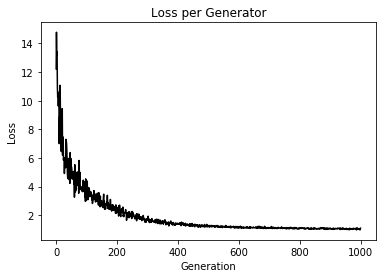

In [11]:
plt.plot(loss_vec, 'k-')
plt.title('Loss per Generator')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.show()